# YAMS

This notebook is meant to explore the mathematics of the YAMS, and give a few hints towards the best strategy.

In [37]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

La probablité d'obtenir _k_ fois le chiffre 1 en ayant lancé _n_ dés est
$$ P(X=k, n) = \binom{n}{k} p^k (1-p)^{n-k} $$

Par ailleurs, la probabilité d'obtenir en cumulé _k_ 1 (en relançant à chaque itération les dés qui ne sont pas des 1) s'exprime par récurrence
$$ P(X_{j+1}) = \sum_{i=0}^k P(X_j = i) \times P(X=k-i, n-i) $$

In [2]:
X0 = np.array([1, 0, 0, 0, 0, 0])

In [165]:
p=1/6
n=5

M = np.array([
    [
        math.comb(n-i, k-i) * math.pow(p, k-i) * math.pow(1-p, n-k) if i <= k else 0
        for i in range(n+1)
    ] for k in range(n+1)
])

In [170]:
def pprint(matrix):
    for row in matrix:
        for val in row:
            print(f"{val:.3f}", end=" ")
        print()
pprint(M)

0.402 0.000 0.000 0.000 0.000 0.000 
0.402 0.482 0.000 0.000 0.000 0.000 
0.161 0.386 0.579 0.000 0.000 0.000 
0.032 0.116 0.347 0.694 0.000 0.000 
0.003 0.015 0.069 0.278 0.833 0.000 
0.000 0.001 0.005 0.028 0.167 1.000 


In [172]:
M2 = np.dot(M, M)
M3 = np.dot(M, M2)
print("M2")
pprint(M2)
print("\nM3")
pprint(M3)

M2
0.162 0.000 0.000 0.000 0.000 0.000 
0.355 0.233 0.000 0.000 0.000 0.000 
0.313 0.409 0.335 0.000 0.000 0.000 
0.138 0.270 0.442 0.482 0.000 0.000 
0.030 0.079 0.195 0.424 0.694 0.000 
0.003 0.009 0.029 0.093 0.306 1.000 

M3
0.065 0.000 0.000 0.000 0.000 0.000 
0.236 0.112 0.000 0.000 0.000 0.000 
0.344 0.327 0.194 0.000 0.000 0.000 
0.250 0.357 0.423 0.335 0.000 0.000 
0.091 0.173 0.308 0.488 0.579 0.000 
0.013 0.032 0.075 0.177 0.421 1.000 


In [13]:
Xis = [X0]
for i in range(20):
    Xis.append(np.dot(M, Xis[-1]))
Xis = np.array(Xis)

In [12]:
Xis

[array([1, 0, 0, 0, 0, 0]),
 array([4.01877572e-01, 4.01877572e-01, 1.60751029e-01, 3.21502058e-02,
        3.21502058e-03, 1.28600823e-04]),
 array([0.16150558, 0.35531228, 0.31267481, 0.13757692, 0.03026692,
        0.00266349]),
 array([0.06490547, 0.23625592, 0.34398861, 0.25042371, 0.09115423,
        0.01327206]),
 array([0.02608405, 0.1400192 , 0.30064922, 0.32277701, 0.1732667 ,
        0.03720383]),
 array([0.0104826 , 0.07800729, 0.23219961, 0.34558732, 0.25717226,
        0.07655092]),
 array([0.00421272, 0.04183197, 0.16615527, 0.3299817 , 0.32766919,
        0.13014915]),
 array([0.001693  , 0.0218666 , 0.11297075, 0.29182386, 0.3769169 ,
        0.1947289 ]),
 array([0.00068038, 0.01122561, 0.07408493, 0.2444667 , 0.40334768,
        0.2661947 ]),
 array([2.73428593e-04, 5.68701445e-03, 4.73134619e-02, 1.96813609e-01,
        4.09350692e-01, 3.40561793e-01]),
 array([1.09884819e-04, 2.85246509e-03, 2.96184938e-02, 1.53771413e-01,
        3.99170323e-01, 4.14477421e-01]),


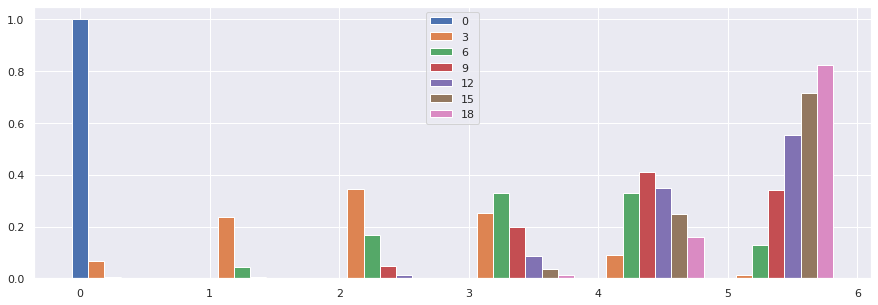

In [39]:
vals = np.arange(n+1)
skip = 3
N = len(Xis)/skip + 1
plt.figure(figsize=(15, 5))
for i, Xi in enumerate(Xis[::skip]):
    plt.bar(vals + i / N, Xi, width=1/N, label=str(i * skip))
plt.legend()

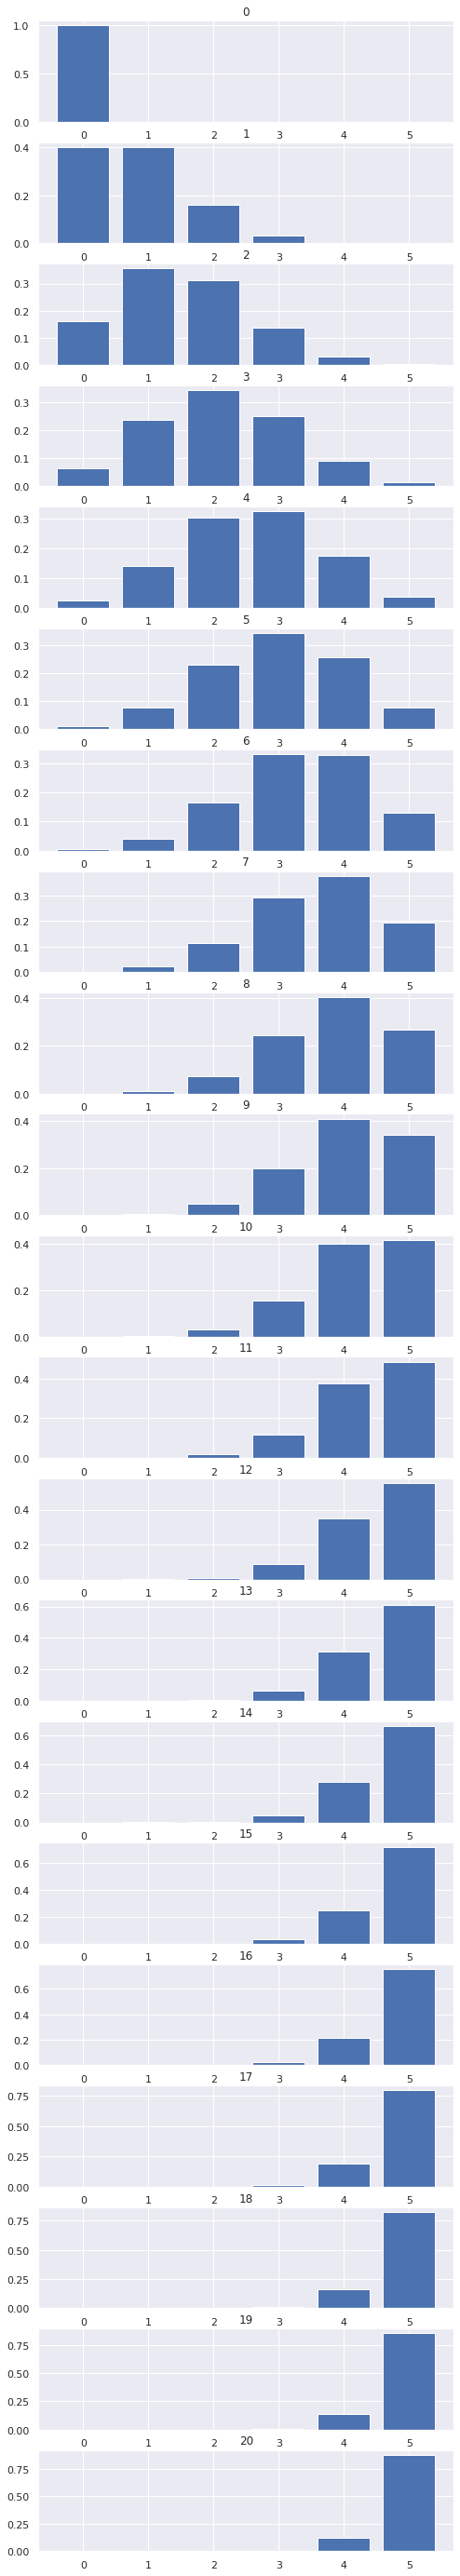

In [41]:
# Different vizualization
fig, axes = plt.subplots(nrows=len(Xis), figsize=(8, 50))
for i, (ax, Xi) in enumerate(zip(axes, Xis)):
    ax.bar(vals, Xi)
    ax.set_title(str(i))

# Let's compare to empirical results

In [153]:
M = 100_000
all_res = []
for m in range(M):
    n = 5  # number of dices to throw
    res = [0]
    for draw in range(len(Xis)):
        if n > 0:
            k = sum(np.random.randint(1, 7, n) == 1)
            res.append(k)
            n = n - k
        else:
            res.append(0)
    all_res.append(res)
all_res = np.array(all_res)
print(all_res)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [154]:
number_of_ones = all_res.cumsum(axis=1)

In [155]:
number_of_ones

array([[0, 0, 1, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 1, 2, ..., 5, 5, 5],
       [0, 0, 1, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5]])

In [156]:
Xjs = []
for j in range(len(Xis)):
    hist, _ = np.histogram(number_of_ones[:, j], bins=np.arange(7))
    Xjs.append(hist / M)
Xjs = np.array(Xjs)

In [157]:
Xjs

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.0029e-01, 4.0241e-01, 1.6203e-01, 3.1780e-02, 3.3700e-03,
        1.2000e-04],
       [1.6202e-01, 3.5451e-01, 3.1300e-01, 1.3719e-01, 3.0480e-02,
        2.8000e-03],
       [6.5400e-02, 2.3442e-01, 3.4229e-01, 2.5351e-01, 9.1230e-02,
        1.3150e-02],
       [2.7300e-02, 1.3864e-01, 2.9795e-01, 3.2371e-01, 1.7454e-01,
        3.7860e-02],
       [1.0950e-02, 7.7230e-02, 2.3176e-01, 3.4449e-01, 2.5773e-01,
        7.7840e-02],
       [4.6600e-03, 4.1150e-02, 1.6511e-01, 3.2887e-01, 3.2862e-01,
        1.3159e-01],
       [1.9900e-03, 2.1940e-02, 1.1141e-01, 2.9268e-01, 3.7753e-01,
        1.9445e-01],
       [7.7000e-04, 1.1880e-02, 7.2610e-02, 2.4572e-01, 4.0165e-01,
        2.6737e-01],
       [2.3000e-04, 6.2000e-03, 4.6220e-02, 1.9794e-01, 4.0719e-01,
        3.4222e-01],
       [8.0000e-05, 3.1200e-03, 2.8940e-02, 1.5404e-01, 3.9842e-01,
        4.1540e-01],
       [4.0000e-05, 1

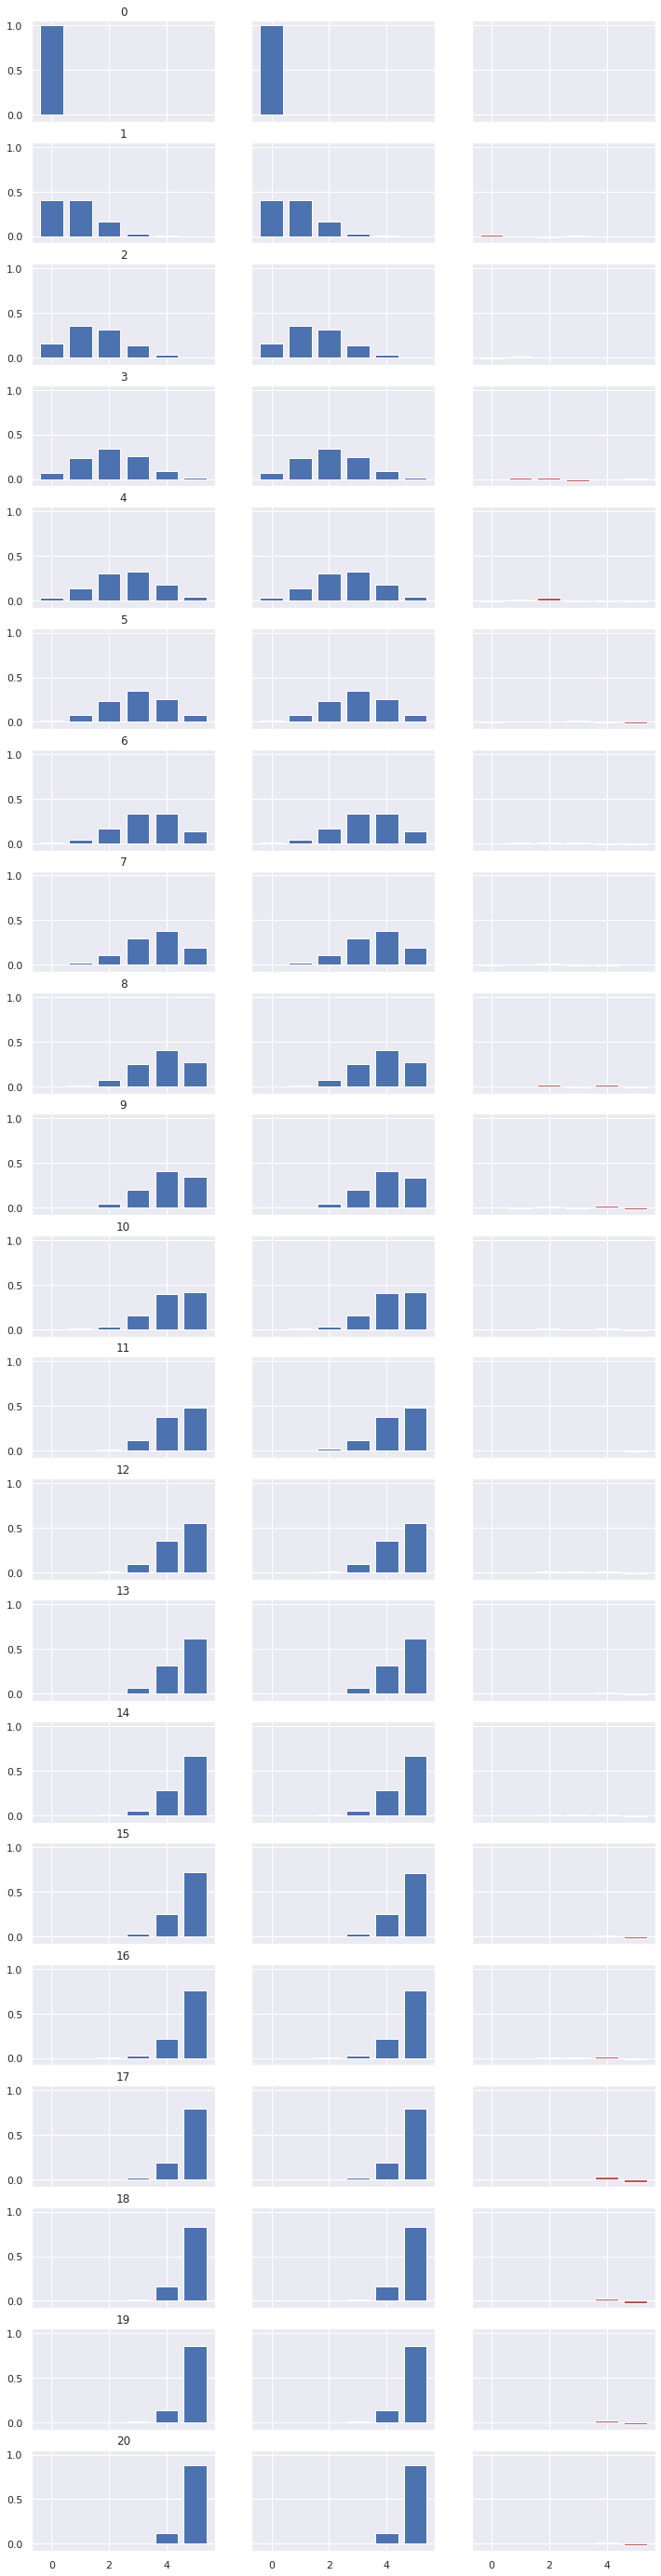

In [158]:
fig, axes = plt.subplots(nrows=len(Xjs), ncols=3, figsize=(12, 50), sharey=True, sharex=True)
for j, ax in enumerate(axes):
    ax[0].bar(vals, Xjs[j])
    ax[1].bar(vals, Xis[j])
    ax[2].bar(vals, 10*(Xis[j] - Xjs[j]), color="r")
    ax[0].set_title(str(j))

In [159]:
(Xis-Xjs).mean()

1.6951414919019394e-16